In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
years = [1994, 2004, 2014, 2024]
water_area = [59, 44, 100, 78]

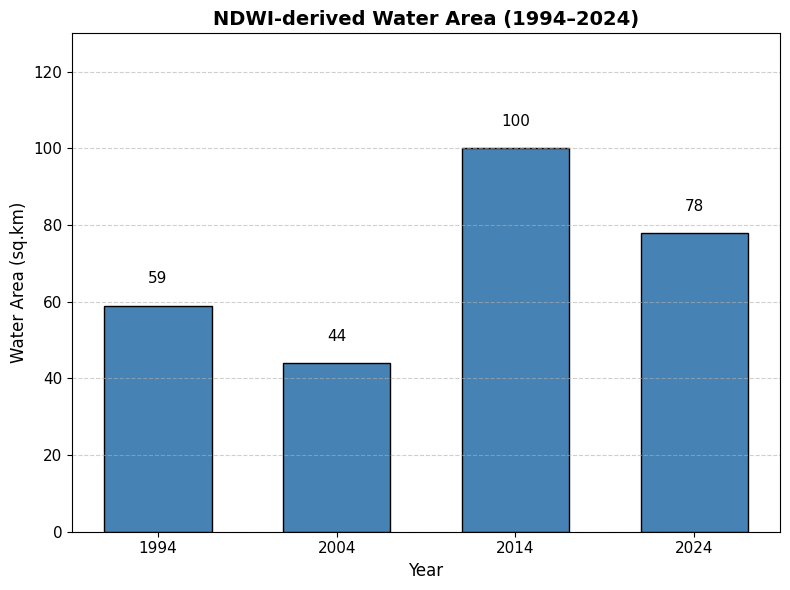

In [3]:
# Bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(years, water_area, color="steelblue", width=6, edgecolor="black")

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval}',
             ha='center', va='bottom', fontsize=11)

# Title and labels
plt.title("NDWI-derived Water Area (1994–2024)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Water Area (sq.km)", fontsize=12)

# Formatting
plt.xticks(years, fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, max(water_area) + 30)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Save high-resolution figure for research papers
plt.tight_layout()
plt.savefig("NDWI_Water_Area_Barchart.png", dpi=300)

plt.show()

In [4]:
# Define the data arrays
Changes_year = ['Change_2024_2014', 'Change_2014_2004', 'Change_2004_1994', 'Change_2024_1994']
water_gained = [2.65, 57.66, 12.83, 27.69]
water_lost = [20.81, 1.03, 27.61, 3.25]

# Create a DataFrame for Plotly
changes_df = pd.DataFrame({
    'Period': Changes_year,
    'Water Gained (sq.km)': water_gained,
    'Water Lost (sq.km)': water_lost
})

# Melt the DataFrame to long format for Plotly Express
changes_melted = changes_df.melt('Period', var_name='Change Type', value_name='Area (sq.km)')

# Create a grouped bar chart using Plotly Express
fig = px.bar(changes_melted, x='Period', y='Area (sq.km)', color='Change Type',
             barmode='group', title='Water Area Change Over Different Periods')

# Update layout for better readability and research format
fig.update_layout(
    xaxis_title="Period of Change",
    yaxis_title="Area (sq.km)",
    title_x=0.5, # Center the title
    font=dict(size=12),
    legend_title_text='Change Type'
)

# Show the figure
fig.show()

# You can also save the figure as an HTML file for embedding in reports
# fig.write_html("NDWI_Water_Area_Changes_Grouped_Barchart.html")

In [5]:
# Create a line chart using Plotly Express
fig_line = px.line(changes_melted, x='Period', y='Area (sq.km)', color='Change Type',
                   title='Water Area Change Over Different Periods (Line Chart)')

# Update layout for better readability and research format
fig_line.update_layout(
    xaxis_title="Period of Change",
    yaxis_title="Area (sq.km)",
    title_x=0.5, # Center the title
    font=dict(size=12),
    legend_title_text='Change Type'
)

# Add markers to the line
fig_line.update_traces(mode='lines+markers')

# Show the figure
fig_line.show()

# You can also save the figure as an HTML file
# fig_line.write_html("NDWI_Water_Area_Changes_Line_Chart.html")

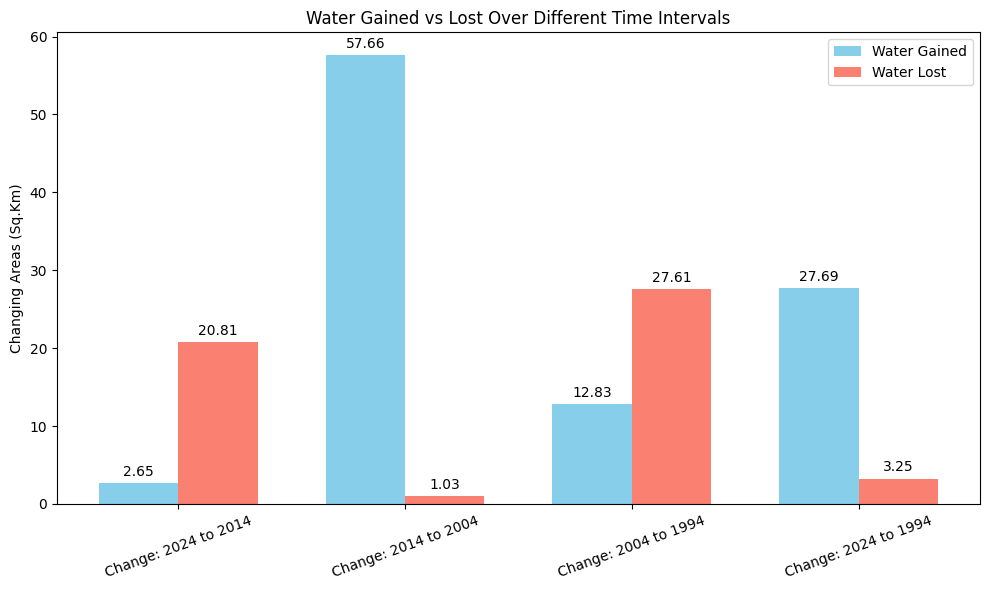

In [6]:
# Data
Changes_year = ['Change: 2024 to 2014', 'Change: 2014 to 2004', 'Change: 2004 to 1994', 'Change: 2024 to 1994']
water_gained = [2.65, 57.66, 12.83, 27.69]
water_lost = [20.81, 1.03, 27.61, 3.25]

# Positions
x = np.arange(len(Changes_year))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, water_gained, width, label='Water Gained', color='skyblue')
rects2 = ax.bar(x + width/2, water_lost, width, label='Water Lost', color='salmon')

# Labels and title
ax.set_ylabel('Changing Areas (Sq.Km)')
ax.set_title('Water Gained vs Lost Over Different Time Intervals')
ax.set_xticks(x)
ax.set_xticklabels(Changes_year, rotation=20)
ax.legend()

# Add values on top of bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()